In [1]:
# import tensoflow.keras
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
# from PIL import Image

In [2]:
np.random.seed(1337)

#-- Cargar sólo las imágenes sin las etiquetas ---
(x_train, _), (x_test, _) = mnist.load_data()
input_dim = 28*28
x_train = np.reshape(x_train, [-1, input_dim])/255.0
x_test = np.reshape(x_test,   [-1, input_dim])/255.0

print(x_train.shape,x_test.shape,input_dim)

(60000, 784) (10000, 784) 784


In [3]:
# This is the size of our encoded representations
encoding_dim = 32  # 32 flotantes -> factor de compresion 24.5, asumiendo una entrada de 28x28=784

##-------- ENCODER ---------------
encoder_input = Input(shape=(input_dim,), name='encoder_input')
code = Dense(encoding_dim, activation='relu', name='latent_vector')(encoder_input)
encoder = Model(encoder_input, code, name='encoder')

##------- DECODER -----------
latent_input = Input(shape=(encoding_dim,), name='decoder_input')
decoded_image = Dense(input_dim,activation="sigmoid",name='decoder_output')(latent_input)
decoder = Model(latent_input, decoded_image, name='decoder')

# Este modelo mapea una entrada en su reconstrucción
autoencoder = Model(encoder_input, decoder(encoder(encoder_input)), name='autoencoder')

autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

print(encoder.summary()) 
print(decoder.summary()) 
print(autoencoder.summary()) 

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
latent_vector (Dense)        (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________
None
Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 32)]              0         
_________________________________________________________________
decoder_output (Dense)       (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________
None
Model: "autoencoder"
___

In [4]:
batch_size = 128
# Entrenando el autoencoder
autoencoder.fit(x_train,
                x_train,
                validation_data=(x_test, x_test),
                epochs=50,
                batch_size=batch_size)

Epoch 1/50
469/469 [==============================] - 2s 5ms/step - loss: 0.2298 - val_loss: 0.1601
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.1421 - val_loss: 0.1265
Epoch 3/50
469/469 [==============================] - 3s 5ms/step - loss: 0.1197 - val_loss: 0.1117
Epoch 4/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1086 - val_loss: 0.1034
Epoch 5/50
469/469 [==============================] - 2s 5ms/step - loss: 0.1020 - val_loss: 0.0984
Epoch 6/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0981 - val_loss: 0.0957
Epoch 7/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0961 - val_loss: 0.0943
Epoch 8/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0952 - val_loss: 0.0935
Epoch 9/50
469/469 [==============================] - 2s 5ms/step - loss: 0.0946 - val_loss: 0.0931
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.0942 - val_loss: 0.0927

In [5]:
# Predicción del Autoencoder 
x_decoded = autoencoder.predict(x_test)

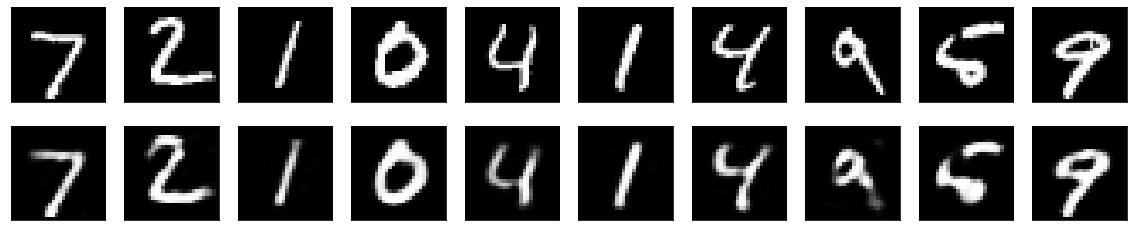

In [6]:
# Codifica y decodifica algunos dígitos
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # Cantidad de dígitos a visualizar
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Visualizando la reconstrucción
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


